In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset1.csv')

## **Exploratory Data Analaysis**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
print(f"duplicated entries: {df.duplicated().sum()}")
duplicated_entries = df[df.duplicated()]
print(duplicated_entries)

duplicated entries: 418
                                                  review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]


In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace = True)

sentiment
positive    24884
negative    24698
Name: count, dtype: int64


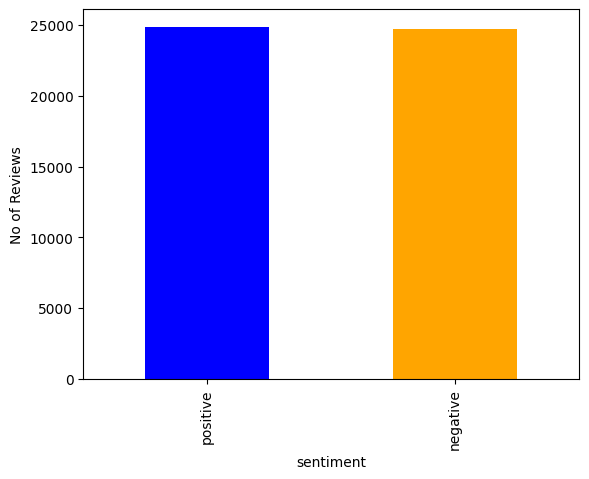

In [8]:
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.ylabel('No of Reviews')
plt.show()

count    49582.000000
mean      1310.568230
std        990.762238
min         32.000000
25%        699.000000
50%        971.000000
75%       1592.000000
max      13704.000000
Name: review_length, dtype: float64


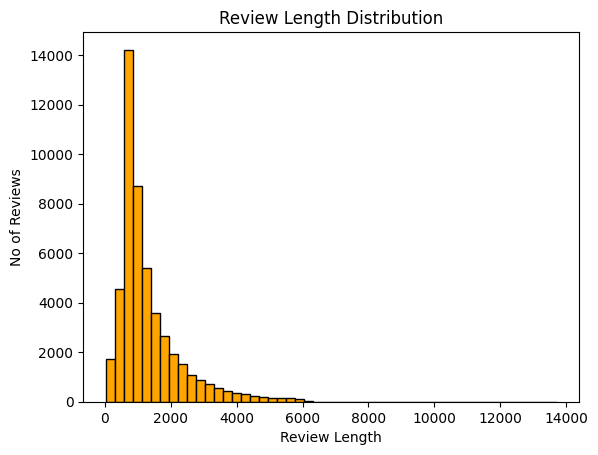

In [9]:
df['review_length']=df['review'].apply(len)
print(df['review_length'].describe())

plt.hist(df['review_length'], bins= 50,color = 'orange',edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('No of Reviews')
plt.title('Review Length Distribution')
plt.show()

In [10]:
nltk.download('stopwords')
stop_words= set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def text_preprocess(text):
  tokens = text.lower().translate(str.maketrans('','',string.punctuation)).split()
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

all_words = [word for review in df['review'] for word in text_preprocess(review)]


In [12]:
from collections import Counter
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

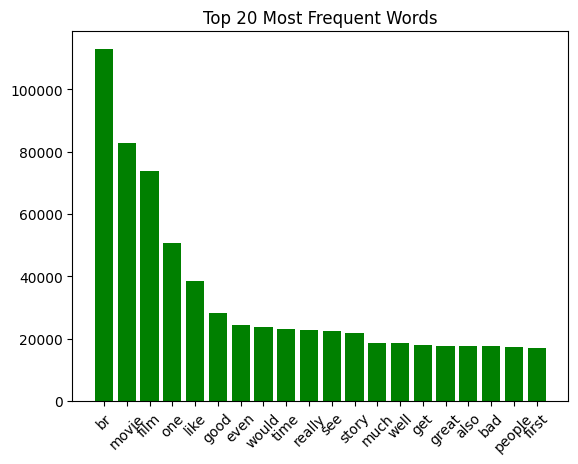

In [13]:
words, counts = zip(*most_common)
plt.bar(words, counts, color='green')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

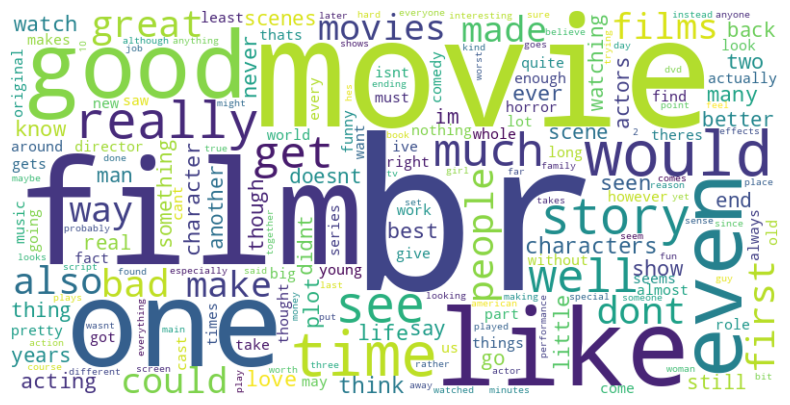

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(word_freq)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### **Text Preprocessing**

In [15]:
def textCleaning(text):
  text = text.lower()
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-z\s]', '', text)
  return text

df['review'] = df['review'].apply(textCleaning)

# Display a few cleaned reviews
print(df['review'].head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object


In [16]:
def remove_stopwords(text):
  tokens = text.split()
  tokens = [word for word in tokens if word not in stop_words]
  return ' '.join(tokens)

df['review'] = df['review'].apply(remove_stopwords)


In [17]:
df['tokenized_review'] = df['review'].apply(lambda x: x.split())

print(df[['review', 'tokenized_review']].head())

                                              review  \
0  one reviewers mentioned watching oz episode yo...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, oz, epis...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, theres, family, little, boy, jake,...  
4  [petter, matteis, love, time, money, visually,...  


In [18]:
# df.drop(columns=['cleaned_review'], inplace=True)
# df

In [19]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_review'] = df['tokenized_review'].apply(lemmatize_tokens)

In [21]:
# df.to_csv('preprocessed_reviews.csv', index=False)

# **ML Models**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
df['final_review']= df['lemmatized_review'].apply(lambda x: ' '.join(x))

x= df['final_review']
y= df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 39665, Testing samples: 9917


In [24]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF Vectorized Shape: {X_train_tfidf.shape}")


TF-IDF Vectorized Shape: (39665, 5000)


## **Naive Bayes**

In [25]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

Y_pred_nb = nb_model.predict(X_test_tfidf)

print('Naive Bayes Classifier Results:')
print(classification_report(Y_test, Y_pred_nb))
print(f'Accuracy: {accuracy_score(Y_test, Y_pred_nb):.2f}')

Naive Bayes Classifier Results:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4939
           1       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Accuracy: 0.85


## **Losgistic Regression:**

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, Y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Results:")
print(classification_report(Y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(Y_test, y_pred_lr):.2f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Accuracy: 0.88


# **DL Models**

## **LSTM**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, Y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, Y_test)
print(f"LSTM Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.7900 - loss: 0.4330 - val_accuracy: 0.8736 - val_loss: 0.3075
Epoch 2/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8984 - loss: 0.2549 - val_accuracy: 0.8756 - val_loss: 0.2930
Epoch 3/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9237 - loss: 0.2013 - val_accuracy: 0.8782 - val_loss: 0.3106
Epoch 4/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9411 - loss: 0.1612 - val_accuracy: 0.8794 - val_loss: 0.3199
Epoch 5/5
620/620 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9561 - loss: 0.1260 - val_accuracy: 0.8746 - val_loss: 0.3814
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8736 - loss: 0.3833
LSTM Model Accuracy: 0.87


## **RNN**

In [28]:
from tensorflow.keras.layers import SimpleRNN

# Build the RNN model
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_pad, Y_train, epochs=4, batch_size=64, validation_data=(X_test_pad, Y_test))

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, Y_test)
print(f"RNN Model Accuracy: {rnn_accuracy:.2f}")


Epoch 1/4
620/620 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.5773 - loss: 0.6485 - val_accuracy: 0.8205 - val_loss: 0.4045
Epoch 2/4
620/620 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8374 - loss: 0.3972 - val_accuracy: 0.8491 - val_loss: 0.3562
Epoch 3/4
620/620 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.7800 - loss: 0.4578 - val_accuracy: 0.7568 - val_loss: 0.5150
Epoch 4/4
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7384 - loss: 0.5400 - val_accuracy: 0.7860 - val_loss: 0.4694
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7807 - loss: 0.4732
RNN Model Accuracy: 0.79


In [29]:
# Predict probabilities
y_pred_lstm_probs = model.predict(X_test_pad)

# Converting probabilities to binary classes
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Predict probabilities
y_pred_rnn_probs = rnn_model.predict(X_test_pad)

# Converting probabilities to binary classes
y_pred_rnn = (y_pred_rnn_probs > 0.5).astype(int)


310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [30]:
##Performace matrics of models.
##Naive Bayes
nb_metrics = classification_report(Y_test, Y_pred_nb, output_dict=True)
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)

nb_precision = nb_metrics['weighted avg']['precision']
nb_recall = nb_metrics['weighted avg']['recall']
nb_f1_score = nb_metrics['weighted avg']['f1-score']

##logistic regression
lr_metrics = classification_report(Y_test, y_pred_lr, output_dict=True)
lr_accuracy = accuracy_score(Y_test, y_pred_lr)

lr_precision = nb_metrics['weighted avg']['precision']
lr_recall = nb_metrics['weighted avg']['recall']
lr_f1_score = nb_metrics['weighted avg']['f1-score']





In [34]:
# LSTM classification report
lstm_metrics = classification_report(Y_test, y_pred_lstm, output_dict=True)
lstm_accuracy = accuracy_score(Y_test, y_pred_lstm)

# Extracting metrics
lstm_precision = lstm_metrics['weighted avg']['precision']
lstm_recall = lstm_metrics['weighted avg']['recall']
lstm_f1_score = lstm_metrics['weighted avg']['f1-score']


print("LSTM Classification Report:")
print(classification_report(Y_test, y_pred_lstm))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4939
           1       0.88      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

LSTM Accuracy: 0.87


In [32]:
# RNN classification report
rnn_metrics = classification_report(Y_test, y_pred_rnn, output_dict=True)
rnn_accuracy = accuracy_score(Y_test, y_pred_rnn)

# Extracting metrics
rnn_precision = rnn_metrics['weighted avg']['precision']
rnn_recall = rnn_metrics['weighted avg']['recall']
rnn_f1_score = rnn_metrics['weighted avg']['f1-score']

print("RNN Classification Report:")
print(classification_report(Y_test, y_pred_rnn))
print(f"RNN Accuracy: {rnn_accuracy:.2f}")


RNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      4939
           1       0.81      0.74      0.78      4978

    accuracy                           0.79      9917
   macro avg       0.79      0.79      0.79      9917
weighted avg       0.79      0.79      0.79      9917

RNN Accuracy: 0.79


In [36]:
results = {
    "Model": ["Naive Bayes", "Logistic Regression", "LSTM", "RNN"],
    "Accuracy": [nb_accuracy, lr_accuracy, lstm_accuracy, rnn_accuracy],
    "Precision": [nb_precision, lr_precision, lstm_precision, rnn_precision],
    "Recall": [nb_recall, lr_recall, lstm_recall, rnn_recall],
    "F1-Score": [nb_f1_score, lr_f1_score, lstm_f1_score, rnn_f1_score],
}


results_df = pd.DataFrame(results)

results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.851971,0.852004,0.851971,0.851964
1,Logistic Regression,0.882827,0.852004,0.851971,0.851964
2,LSTM,0.874559,0.874768,0.874559,0.874548
3,RNN,0.786024,0.788243,0.786024,0.785661
